In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset = []
dataset_test = []

for i in range(0, 200):
    dataset.append([np.random.uniform(0.9, 1.0), np.random.uniform(0.45, 0.55),
                    np.random.uniform(0.0, 0.1), 0])
    dataset.append([np.random.uniform(0.0, 0.1), np.random.uniform(0.35, 0.45),
                    np.random.uniform(0.35, 0.45), 1])
    dataset.append([np.random.uniform(0.7, 1.0), np.random.uniform(0.1, 0.3),
                    np.random.uniform(0.7, 1.0), 2])
    dataset.append([np.random.uniform(0.0, 0.1), np.random.uniform(0.9, 1.0),
                    np.random.uniform(0.7, 1.0), 3])

for i in range(0, 100):
    dataset_test.append([np.random.uniform(0.9, 1.0), np.random.uniform(0.45, 0.55),
                    np.random.uniform(0.0, 0.1), 0])
    dataset_test.append([np.random.uniform(0.0, 0.1), np.random.uniform(0.35, 0.45),
                np.random.uniform(0.35, 0.45), 1])
    dataset_test.append([np.random.uniform(0.7, 1.0), np.random.uniform(0.1, 0.3),
                    np.random.uniform(0.7, 1.0), 2])
    dataset_test.append([np.random.uniform(0.0, 0.1), np.random.uniform(0.9, 1.0),
                    np.random.uniform(0.7, 1.0), 3])

data_train = pd.DataFrame(dataset)
data_test = pd.DataFrame(dataset_test)
data_train.columns = ['x', 'y', 'z', 'label']
data_test.columns = ['x', 'y', 'z', 'label']

labels_train = data_train['label']
data_train = data_train.drop(labels=['label'], axis=1)

labels_test = data_test['label']
data_test = data_test.drop(labels=['label'], axis=1)

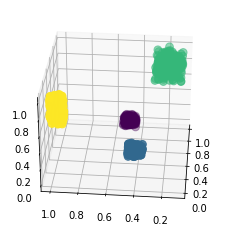

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_train['x'], data_train['y'], data_train['z'], c=labels_train, s=60)
ax.view_init(30, 185)
plt.show()

In [4]:
from centroid_network.CentroidNetwork import CentroidNetwork
from centroid_network.CentroidLayer import CentroidLayer
from centroid_network.utils import *

CN = CentroidNetwork()

CL0 = CentroidLayer(m=150)
CN.append_layer(CL0)

In [5]:
CN.train(data_train, labels_train)

100%|██████████| 4/4 [00:01<00:00,  2.92it/s]


[Layer 0] Training the network (calculating centroids)...
[Layer 0] Feeding data forward...


In [6]:
predicted_labels, embeddings = CN.predict(data_test)

100%|██████████| 400/400 [00:02<00:00, 166.32it/s]


[Layer 0] Feeding datapoints forward...
Predicting labels for datapoints...
Prediction finished.


In [7]:
score = evaluate(labels_test, predicted_labels)
print("Score is: {}".format(score))

Evaluating test dataset...
Score is: 1.0


In [8]:
embeddings_to_plot = []
for embedding in embeddings:
    embeddings_to_plot.append(embedding.coordinates)
embeddings_to_plot = np.array(embeddings_to_plot)

In [9]:
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings_to_plot)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.002s...
[t-SNE] Computed neighbors for 400 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.238598
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.044506
[t-SNE] KL divergence after 300 iterations: 0.346086
t-SNE done! Time elapsed: 0.373138427734375 seconds


In [10]:
df_predict = defaultdict()
df_predict['x'] = tsne_results[:, 0]
df_predict['y'] = tsne_results[:, 1]
df_predict['label'] = predicted_labels.to_numpy()

<AxesSubplot:xlabel='x', ylabel='y'>

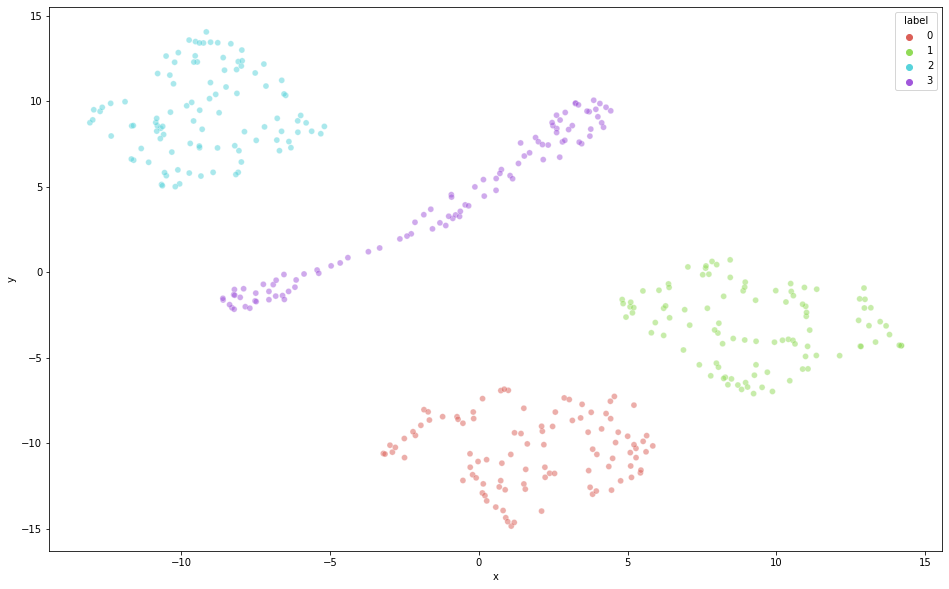

In [11]:
import seaborn as sns

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x='x', y='y',
    hue='label',
    data = df_predict,
    palette=sns.color_palette("hls", 4),
    legend="full",
    alpha=0.5
)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.000s...
[t-SNE] Computed neighbors for 800 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 0.031218
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.456959
[t-SNE] KL divergence after 300 iterations: 0.549126
t-SNE done! Time elapsed: 0.9192285537719727 seconds


<AxesSubplot:xlabel='x', ylabel='y'>

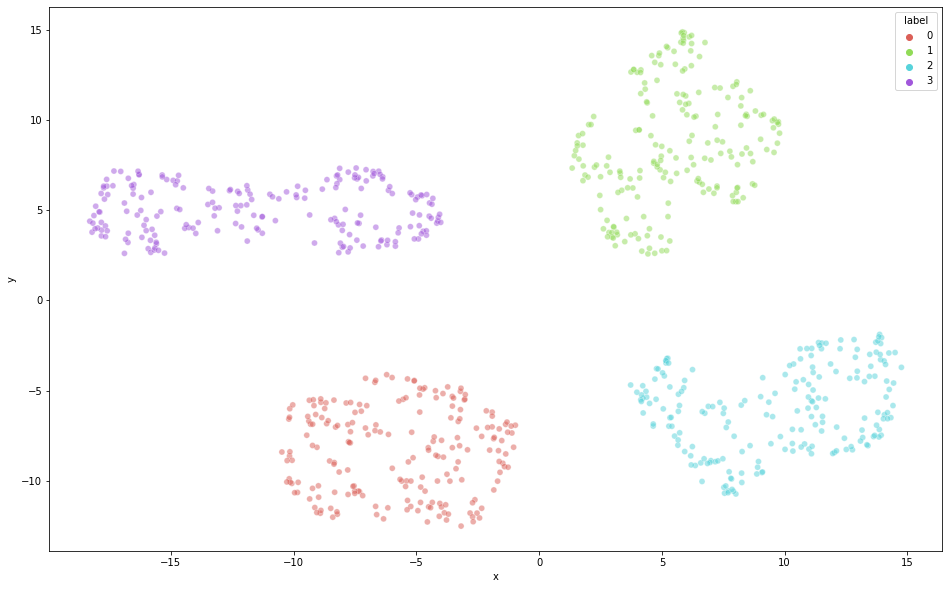

In [12]:
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dataset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_predict = defaultdict()
df_predict['x'] = tsne_results[:, 0]
df_predict['y'] = tsne_results[:, 1]
df_predict['label'] = labels_train

import seaborn as sns

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x='x', y='y',
    hue='label',
    data = df_predict,
    palette=sns.color_palette("hls", 4),
    legend="full",
    alpha=0.5
)